In [1]:
import itertools
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ValueIterationSolution import ValueIteration as ValueIteration2
import visualizations 
from ValueIterationCD import ValueIteration

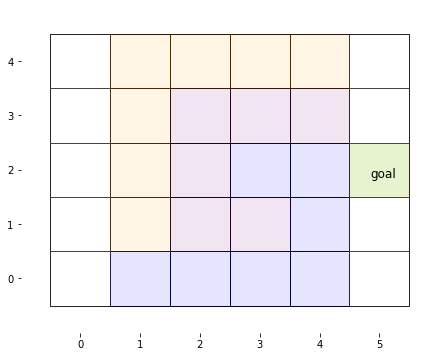

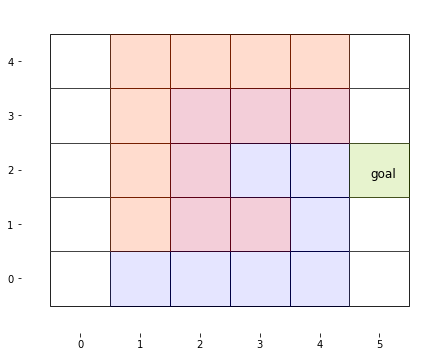

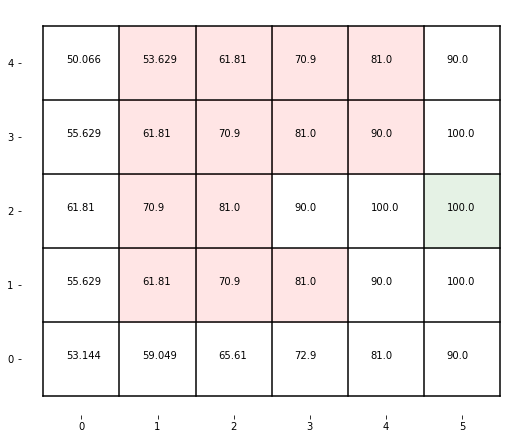

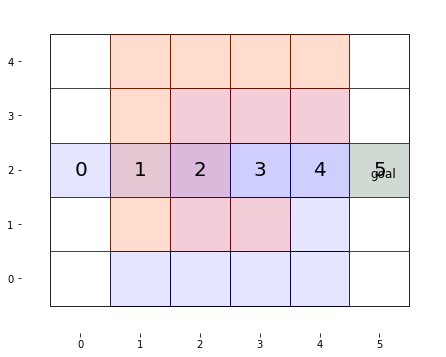

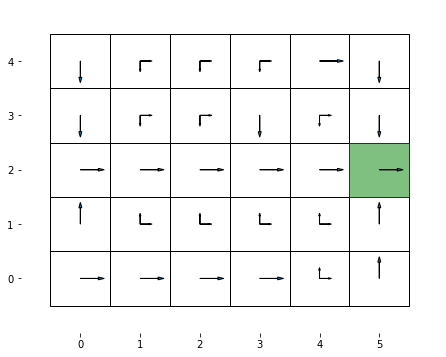

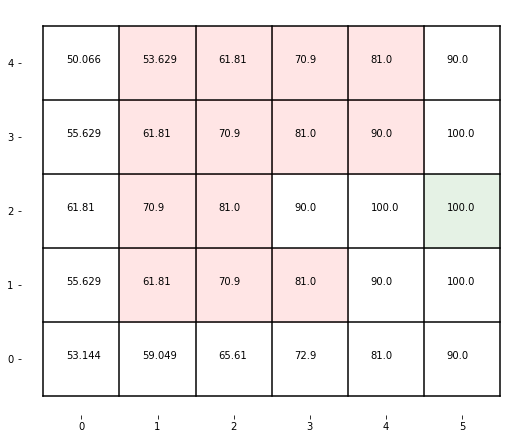

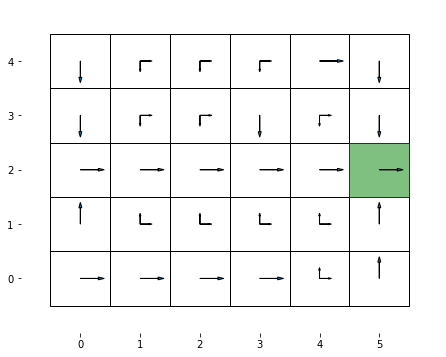

In [7]:
class buildMDP(object):
    def __init__(self, dimensions, stateSpace, colourReward):
        self.dimensions = dimensions
        self.stateSpace = stateSpace
        self.colourReward = colourReward
        
    def buildRewardFunction(self):
        return lambda s, a, nextS: self.colourReward[self.stateSpace[nextS]] 
        
    def buildTransitionFunction(self): 
        n,m = self.dimensions
        return lambda s, a: {((s[0] + a[0]), (s[1] + a[1])) : 1.0} if( ((s[0] + a[0])<m and (s[1] + a[1])<n) and ((s[0] + a[0])>=0 and (s[1] + a[1])>=0) ) else {s:1.0}
    
    
    def __call__(self):
        return ([self.buildRewardFunction(), self.buildTransitionFunction()])

""" giveTraj returns a list containing the trajectory following the given policy from the initial state to the goal state.
    inputs: initial state, policy table, goal state, transition function
 """

def giveTraj(s, policyTable, goal, transitionPdf):
    traj = [s]
    while(s!=goal):
        action = max(policyTable[s], key=policyTable[s].get)
        s = max(transitionPdf(s,action), key = transitionPdf(s,action).get)
        traj.append(s)
    return traj
            
def main():
    dimensions = (5,6)
    goalState = (5,2)
    actions = {(-1,0),(0,1),(0,-1),(1,0)}
    goalNameDictionary = {(5,2):'goal'}
    colourReward = {'white': 0, 'orange': -2, 'purple': -2, 'blue':0, 'yellow':10}
    stateSpace = {(0,0): 'white',(0,1): 'white',(0,2): 'white',(0,3): 'white',(0,4): 'white', (1,0): 'blue',(1,1): 'orange', (1,2):'orange',(1,3):'orange',(1,4):'orange', (2,0): 'blue',(2,1):'purple', (2,2):'purple', (2,3):'purple', (2,4):'orange', (3,0): 'blue',(3,1):'purple',(3,2): 'blue',(3,3):'purple',(3,4):'orange', (4,0): 'blue', (4,1): 'blue', (4,2): 'blue',(4,3):'purple', (4,4):'orange', (5,0):'white',(5,1):'white', (5,2):'yellow', (5,3):'white', (5,4):'white'}
    MDP = buildMDP(dimensions, stateSpace, colourReward)
    rewardFunction, transitionPdf = MDP()

#Visualizing the Task Space 
    visualizations.visualizeEnvironmentByState(stateSpace,[goalState], [], [], goalNameDictionary)
    
#setting the trap states as the ones with -2 reward 
    trapStates = [s for s in stateSpace if(colourReward[stateSpace[s]]<0)]
    visualizations.visualizeEnvironmentByState(stateSpace, [goalState], trapStates, [], goalNameDictionary)

#Running Value Iteration with the Task MDP
    convergenceTolerance = 10e-7
    gamma = .9
    valueTable = {key: 0 for key in stateSpace.keys()}
    performValueIteration = ValueIteration(actions, transitionPdf, rewardFunction, valueTable, convergenceTolerance, gamma)
    optimalValues, policyTable = performValueIteration()

#Visualizing Value Table, Policy and Optimal Trajectory
    trajectory = giveTraj((0,2), policyTable, goalState, transitionPdf)
    n,m = dimensions
    visualizations.visualizeValueTable(m, n, goalState, trapStates, optimalValues)
    visualizations.visualizeEnvironmentByState(stateSpace, [goalState], trapStates, trajectory, goalNameDictionary)
    visualizations.visualizePolicy(stateSpace, policyTable, goalState, otherGoals=[], trapStates=[], arrowScale = .3)
    
#testing Value Iteration 
    transitionDict = {state:{action:transitionPdf(state, action) for action in actions} for state in stateSpace.keys()}
    rewardDict = {state:{action:{list(transitionPdf(state, action).keys())[0]:rewardFunction(state, action,list(transitionPdf(state, action).keys())[0])} for action in actions} for state in stateSpace.keys()}
    valueTable = {key: 0 for key in stateSpace.keys()}

    performValueIteration2 = ValueIteration2(transitionDict, rewardDict, valueTable, convergenceTolerance, gamma)
    optimalValues2, policyTable2 = performValueIteration2()
    visualizations.visualizeValueTable(m, n, goalState, trapStates, optimalValues2)
    #visualizations.visualizeEnvironmentByState(stateSpace, [goalState], trapStates, trajectory, goalNameDictionary)
    visualizations.visualizePolicy(stateSpace, policyTable2, goalState, otherGoals=[], trapStates=[], arrowScale = .3)
    
    
if __name__ == "__main__":
    main()